# <u>UK and Ireland buildings data cleaning</u> 

In [1]:
# Importing Python packages and modules
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

## Uploading the files
#### Buildings data from Geofabrik GmbH and OpenStreetMap Contributor [United Kingdom](https://download.geofabrik.de/europe/united-kingdom.html) and [Ireland](https://download.geofabrik.de/europe/ireland-and-northern-ireland.html)

In [2]:
# Buildings GeoDataFrame (polygons)

#Ireland
buildingsI = gpd.read_file("Ireland_buildings.shp")
#Wales
buildingsW = gpd.read_file("Wales_buildings.shp")
#Scotland
buildingsS = gpd.read_file("Scotland_buildings.shp")
#Britain
buildingsB = gpd.read_file("Britain_buildings.shp")


----------------

## Ireland data

CRS: EPSG:4326
Number of features: 3546367


,osm_id,code,fclass,name,type,geometry
0,4420783,1500,building,Block 10,office,"POLYGON ((-6.37185 53.41181, -6.37156 53.41215..."
1,4420785,1500,building,None,industrial,"POLYGON ((-6.36985 53.41317, -6.36907 53.41373..."
2,4421136,1500,building,Block 4B,office,"POLYGON ((-6.3708 53.41037, -6.37063 53.41058,..."
3,4421148,1500,building,Block 4A,industrial,"POLYGON ((-6.37123 53.40977, -6.37113 53.40988..."
4,4421159,1500,building,Digital Realty DUB10,None,"POLYGON ((-6.37142 53.41236, -6.37114 53.41269..."


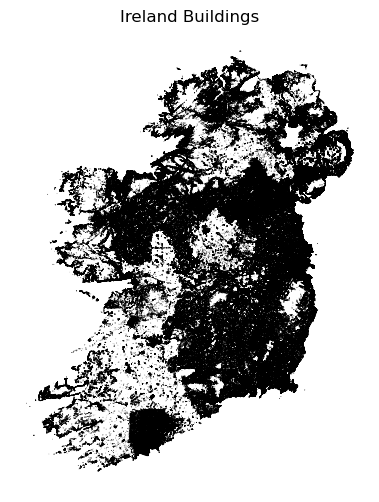

In [3]:
# Checking CRS and basic info for Irish buildings:
print("CRS:", buildingsI.crs)
print("Number of features:", len(buildingsI))
display(buildingsI.head())

# Visulising Irish buildings
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
buildingsI.plot(ax=ax, edgecolor="black", facecolor="lightgray", linewidth=0.5)
ax.set_title("Ireland Buildings")
ax.set_axis_off()
plt.show()

------------------------

## Welsh data

CRS: EPSG:4326
Number of features: 740471


,osm_id,code,fclass,name,type,geometry
0,4292961,1500,building,None,None,"POLYGON ((-3.08191 53.10521, -3.0815 53.10535,..."
1,4989715,1500,building,Cardiff Waterside Multi-Storey Car Park,parking,"POLYGON ((-3.16278 51.46581, -3.1615 51.46641,..."
2,14190665,1500,building,None,depot,"POLYGON ((-3.85198 52.59654, -3.85162 52.59672..."
3,15092171,1500,building,Wales National Pool,None,"POLYGON ((-3.98945 51.60762, -3.98848 51.60777..."
4,15807304,1500,building,Quadrant Shopping Centre,None,"POLYGON ((-3.94648 51.6184, -3.94641 51.61843,..."


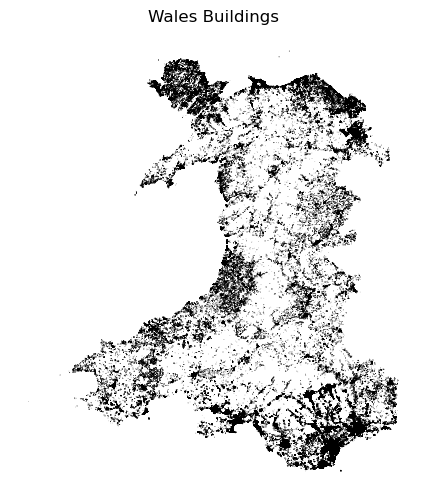

In [4]:
# Checking CRS and basic info for Welsh buildings:
print("CRS:", buildingsW.crs)
print("Number of features:", len(buildingsW))
display(buildingsW.head())

# Visulising Welsh buildings
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
buildingsW.plot(ax=ax, edgecolor="black", facecolor="lightgray", linewidth=0.5)
ax.set_title("Wales Buildings")
ax.set_axis_off()
plt.show()

----------------------------

## Scottish data

CRS: EPSG:4326
Number of features: 1995197


,osm_id,code,fclass,name,type,geometry
0,4064272,1500,building,Perth Railway Station,train_station,"POLYGON ((-3.44088 56.39319, -3.44079 56.39321..."
1,4260486,1500,building,Castle Terrace,parking,"POLYGON ((-3.2044 55.94833, -3.20434 55.94836,..."
2,4271420,1500,building,Queensferry Sports & Community Hub,None,"POLYGON ((-3.38781 55.98487, -3.3878 55.98508,..."
3,4275792,1500,building,None,storage_tank,"POLYGON ((-3.36676 55.97768, -3.36672 55.9778,..."
4,4275793,1500,building,None,storage_tank,"POLYGON ((-3.36884 55.97762, -3.36883 55.97771..."


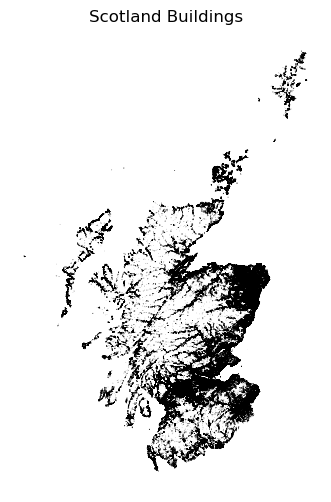

In [5]:
# Checking CRS and basic info for Scottish buildings:
print("CRS:", buildingsS.crs)
print("Number of features:", len(buildingsS))
display(buildingsS.head())

# Visulising Scottish buildings
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
buildingsS.plot(ax=ax, edgecolor="black", facecolor="lightgray", linewidth=0.5)
ax.set_title("Scotland Buildings")
ax.set_axis_off()
plt.show()

--------------------

## British data

CRS: None
Number of features: 12502839


,osm_id,code,fclass,name,type,geometry
0,2956186,1500,building,None,apartments,"POLYGON ((-0.02169 51.44459, -0.02168 51.44464..."
1,2956187,1500,building,Lewisham Town Hall,None,"POLYGON ((-0.02181 51.44498, -0.02161 51.44507..."
2,2956188,1500,building,Broadway Theatre,None,"POLYGON ((-0.02067 51.44542, -0.02064 51.44544..."
3,2956192,1500,building,JD Sports,store,"POLYGON ((-0.01903 51.44461, -0.01902 51.44462..."
4,2956193,1500,building,Air Thrill,store,"POLYGON ((-0.01834 51.445, -0.01815 51.44551, ..."


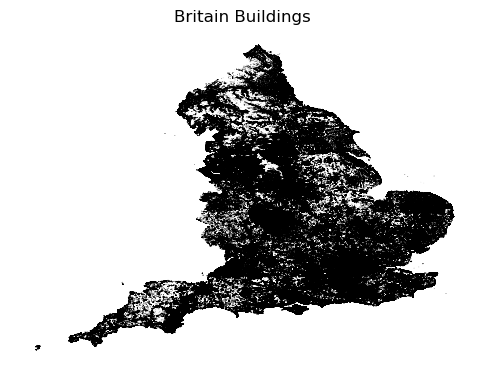

In [6]:
# Checking CRS and basic info British buildings:
print("CRS:", buildingsB.crs)
print("Number of features:", len(buildingsB))
display(buildingsB.head())

# Visulising British buildings
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
buildingsB.plot(ax=ax, edgecolor="black", facecolor="lightgray", linewidth=0.5)
ax.set_title("Britain Buildings")
ax.set_axis_off()
plt.show()

-------------------------------

## Combining the data 

In [7]:
# Britain is missing CRS so making sure they are all the same

buildingsI = buildingsI.set_crs("EPSG:4326")
buildingsW = buildingsW.set_crs("EPSG:4326")
buildingsS = buildingsS.set_crs("EPSG:4326")
buildingsB = buildingsB.set_crs("EPSG:4326")

In [8]:
# Combining the tables into one
buildings = gpd.GeoDataFrame(
    pd.concat([buildingsI, buildingsW, buildingsS, buildingsB], ignore_index=True),
    crs="EPSG:4326" )

# Quick check that the combined features, Ireland: 3546367, Wales: 740471, Scotland: 1995197, Britain: 12502839 = 18784874 
print("Number of combined building features:", len(buildings))
buildings.head()

#saving the image for the write up
outdir = "Data_cleaning_images"
os.makedirs(outdir, exist_ok=True)

n = 10
table = buildings.head(n).drop(columns=['geometry'], errors='ignore') 
table.to_html(f"{outdir}/Buildings_Cleaning_Buildings_Table.html", index=False)

Number of combined building features: 18784874


In [9]:
# Saving the file, into the main folder for use with the main notebooks
buildings.to_file("../UK_Ireland_Buildings.gpkg", layer="buildings", driver="GPKG")

In [10]:
# Uploading the saved file
buildings = gpd.read_file("../UK_Ireland_Buildings.gpkg")

CRS: EPSG:4326
Number of features: 18784874


,osm_id,code,fclass,name,type,geometry
0,4420783,1500,building,Block 10,office,"MULTIPOLYGON (((-6.37185 53.41181, -6.37156 53..."
1,4420785,1500,building,None,industrial,"MULTIPOLYGON (((-6.36985 53.41317, -6.36907 53..."
2,4421136,1500,building,Block 4B,office,"MULTIPOLYGON (((-6.3708 53.41037, -6.37063 53...."
3,4421148,1500,building,Block 4A,industrial,"MULTIPOLYGON (((-6.37123 53.40977, -6.37113 53..."
4,4421159,1500,building,Digital Realty DUB10,None,"MULTIPOLYGON (((-6.37142 53.41236, -6.37114 53..."


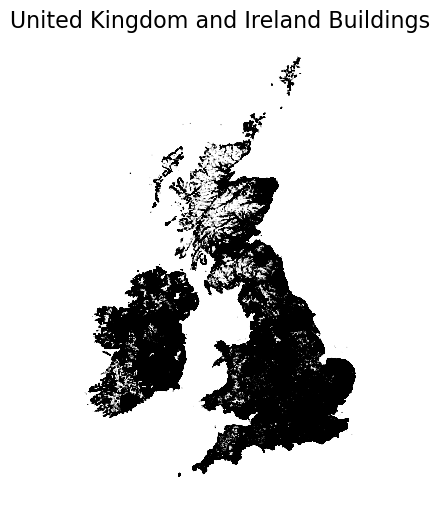

In [17]:
# Checking CRS and basic info of the uploaded file is the same
print("CRS:", buildings.crs)
print("Number of features:", len(buildings))
display(buildings.head())

# Visulising combined UK and Ireland buildings
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
buildings.plot(ax=ax, edgecolor="black", facecolor="lightgray", linewidth=0.5)
ax.set_title("United Kingdom and Ireland Buildings", fontsize=16)
ax.set_axis_off()

# Saving to 'Images' folder for use in write up
plt.savefig("Data_cleaning_images/Building_Cleaning_UK_Ireland_buildings.png", dpi=150, bbox_inches="tight")
plt.show()

----------------------

## Exploring the data
#### Looking at missing and unique building types

In [18]:
# Looking at the building type labels
num_unique = buildings['type'].nunique()
print(f"Number of unique non-null building types: {num_unique}")


Number of unique non-null building types: 1193


In [19]:
# Listing unique building types
unique_types = sorted(buildings['type'].unique(), key=lambda x: (str(type(x)), x))
for t in unique_types:
    print(t)

None
2
BT hut
British Telecom's so
Centre_for_Ecology_a
Chapter House
Childrens Centre
Chuch Court
Clubhouse
Coffee_Van
Community_Centre
Community_hall
Council
D
Day Nursery
Daycare Centre
Dentist
Education Centre
Elec Sub-station
F
Ferry Waiting Room
Fire Escape
Florence Park Court
G
G-wing
GP_Surgery
Goods Shed
Gun Club
Hall
Halton Hospice
Harlaxton Estates Pr
Health Centre
Heritage
Heritage_Centre
Holiday Pod
Home Lodge
ILS Related
Indoor_Equestrian_Ar
Leisure Centre
Len Forge Centre
Martin House
Masonic Hall
Midelney Pumping Sta
Museum
Neath_Civic_Centre
Neighbourhood Centre
Nursery
Nursery,_School
Orangery
Petrol Station
Pits
Plumbers
Polytunnel
Primary_school
Pumping Station
Railway Cabin
Reston_Primary_Schoo
S
Sales Centre, Show F
Sculpture
Shooting_Hut
Social Club
Southland
Sports facilities
Station Master Home
Sunhouse
Tal-y-fan
Telephone_exchange
The Parkside Club
The Stables
The_Stables
Tillmouth House
Tir Ithel
Toad_Hall
Tomb
University_Chapel
Visitor Centre
Waste Water Tre

In [20]:
# Count of the unique type
type_counts = buildings['type'].value_counts(dropna=False)  # include NaNs
print(type_counts)

type
None                  7151616
house                 6301157
residential           1741003
semidetached_house     649473
garage                 640901
                       ...   
arts centre                 1
filling_station             1
diner                       1
city_gate                   1
Polytunnel                  1
Name: count, Length: 1194, dtype: int64


#### The list is long and messy, so tidying it up and visualising it. Keeping in 'None' as it's impossible to know how relevant the building is, and a lot of entries have minimal entries so combining those into a new section under 'Other'.

## Visulising unique buildings

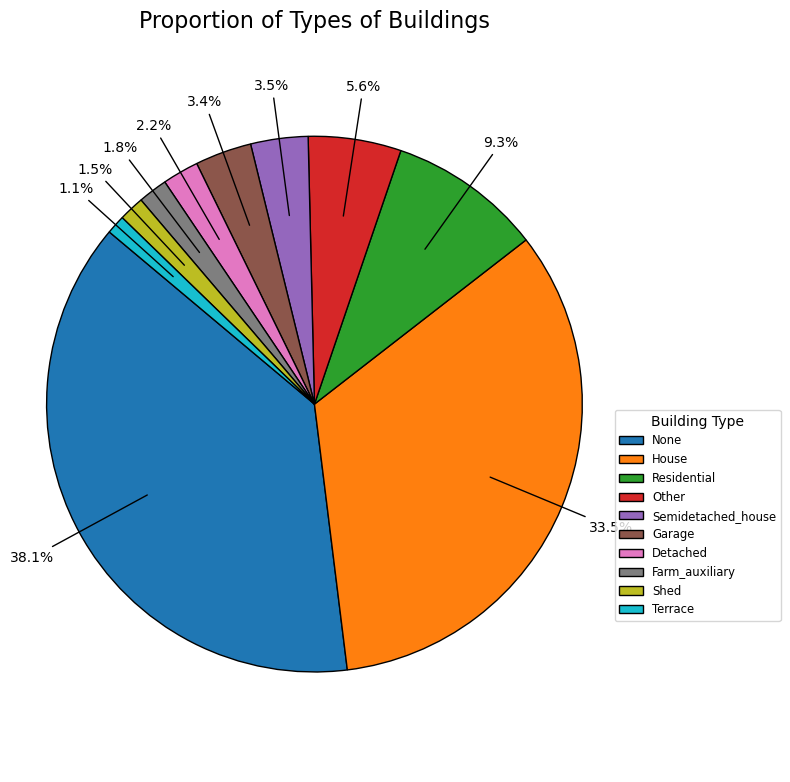

In [21]:
# Computing the percentages
type_percent = type_counts / type_counts.sum() * 100

# Grouping small categories into "Other" category to keep it clean
threshold = 1  # Percent threshold
type_counts_grouped = type_counts.copy()
type_counts_grouped[type_percent < threshold] = 0
other_count = type_counts[type_percent < threshold].sum()

# Final grouped data
type_counts_grouped = type_counts_grouped[type_counts_grouped > 0]
type_counts_grouped["Other"] = other_count
type_counts_grouped = type_counts_grouped.sort_values(ascending=False)


# Creating the pie chart
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(
    type_counts_grouped,
    labels=None,
    startangle=140,
    wedgeprops={'edgecolor': 'black'})

# Add percentage labels, placing them outside as they were a bit squished inside the chart
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2.
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))
    
# Computing the % and adding labels for slices less then 1% to avoid clutter
    percentage = type_counts_grouped.iloc[i] / type_counts_grouped.sum() * 100
    if percentage > 1:  
        plt.annotate(
            f"{percentage:.1f}%",
            xy=(x * 0.7, y * 0.7),  # Start of the stick
            xytext=(x * 1.2, y * 1.2),  # End of the stick
            ha='center', va='center',
            arrowprops=dict(arrowstyle='-', lw=1),
            fontsize=10)

# Capitalising legend labels
capitalized_labels = [str(label).capitalize() for label in type_counts_grouped.index]

# Adding legend
plt.legend(
    wedges,
    capitalized_labels,
    title='Building Type',
    bbox_to_anchor=(1, 0.5),
    loc='upper left',
    fontsize='small')

# Displaying, saving and formatting pie chart
plt.title('Proportion of Types of Buildings', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.savefig("Data_cleaning_images/Building_Cleaning_Building_Types_Piechart.png", dpi=150, bbox_inches="tight")
plt.show()


In [22]:
# Listing unique building fclass to just be sure it's all buildings data
unique_types = sorted(buildings['fclass'].unique(), key=lambda x: (str(type(x)), x))
for t in unique_types:
    print(t)

building
